# Limpieza y exploración de la base de datos "ESTABLECIMIENTOS_EDUCATIVOS-COLOMBIA_20250603", mediante Google Colab

1. Importación de las librerías necesarias

In [399]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, classification_report, f1_score

from statsmodels import api as sm

2. Conexión con Google Drive

In [184]:
#from google.colab import drive
#drive.mount('/content/drive')

3. Carga del DataSet "ESTABLECIMIENTOS_EDUCATIVOS-COLOMBIA_20250603"

In [186]:
df_datosie = pd.read_excel('documents/ESTABLECIMIENTOS_EDUCATIVOS-COLOMBIA_20250603 .xlsx')


In [187]:
# Vista del DataFrame inicial
df_datosie

,secretaria,codigodepartamento,nombredepartamento,nombremunicipio,nombreestablecimiento,zona,niveles,jornadas,modelos_Educativos,discapacidades,calendario
0,BUCARAMANGA,68,SANTANDER,BUCARAMANGA,FUND COL NUEVA GENERACION JUVENIL ...,URBANA,"MEDIA,BÁSICA SECUNDARIA","MAÑANA,NOCTURNA",EDUCACIÓN TRADICIONAL,NaN,A
1,BUCARAMANGA,68,SANTANDER,BUCARAMANGA,COL MUNDO CONSTRUCTIVO ...,URBANA,PREESCOLAR,TARDE,EDUCACIÓN TRADICIONAL,NaN,A
2,BUCARAMANGA,68,SANTANDER,BUCARAMANGA,COL ATENAS ...,URBANA,MEDIA,FIN DE SEMANA,EDUCACIÓN TRADICIONAL,NaN,A
3,SANTANDER,68,SANTANDER,BARBOSA,COLEGIO EVANGÉLICO INTERAMERICANO ...,URBANA,"PREESCOLAR,BÁSICA SECUNDARIA,BÁSICA PRIMARIA",COMPLETA,EDUCACIÓN TRADICIONAL,"DI-COGNITIVO,SÍNDROME DE DOWN",A
4,NORTE SANTANDER,54,NORTE DE SANTANDER,VILLA DEL ROSARIO,COL NUESTRA SEÑORA DEL ROSARIO,URBANA,"PREESCOLAR,MEDIA,BÁSICA SECUNDARIA,BÁSICA PRIM...",MAÑANA,EDUCACIÓN TRADICIONAL,NaN,A
...,...,...,...,...,...,...,...,...,...,...,...
22525,MAGDALENA,47,MAGDALENA,SITIONUEVO,CENTRIO DE FORMACION INFANTIL RAYITO DE LUZ,URBANA,"PREESCOLAR,BÁSICA PRIMARIA",MAÑANA,EDUCACIÓN TRADICIONAL,NaN,A
22526,CARTAGENA,13,BOLÍVAR,CARTAGENA,COL. LA ANUNCIACION,URBANA,"PREESCOLAR,MEDIA,BÁSICA SECUNDARIA,BÁSICA PRIM...",COMPLETA,EDUCACIÓN TRADICIONAL,NaN,A
22527,BUENAVENTURA,76,VALLE DEL CAUCA,BUENAVENTURA,CENTRO EDUCATIVO EUSEBIO ANGULO,URBANA,"PREESCOLAR,MEDIA,BÁSICA SECUNDARIA,BÁSICA PRIM...","MAÑANA,NOCTURNA,TARDE","PROGRAMA PARA JÓVENES EN EXTRAEDAD Y ADULTOS,E...",NaN,A
22528,BOGOTA,11,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",LIC APRENDO CON MIS AMIGOS ...,URBANA,"PREESCOLAR,BÁSICA PRIMARIA",COMPLETA,"PREESCOLAR ESCOLARIZADO_,EDUCACIÓN TRADICIONAL",NaN,A


In [188]:
# Ver los departamentos del DataFrame, para visualizar cuales se filtrarán
df_datosie['nombredepartamento'].value_counts()

nombredepartamento
VALLE DEL CAUCA                                             2485
BOGOTÁ, D.C.                                                2404
NARIÑO                                                      2400
ANTIOQUIA                                                   2188
CUNDINAMARCA                                                1377
ATLÁNTICO                                                   1215
SANTANDER                                                   1126
CAUCA                                                        814
BOLÍVAR                                                      773
CÓRDOBA                                                      743
MAGDALENA                                                    702
BOYACÁ                                                       660
NORTE DE SANTANDER                                           657
TOLIMA                                                       618
CESAR                                                        508
META  

In [189]:
# Reducir el nombre del departamento de ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA
df_datosie['nombredepartamento'] = df_datosie['nombredepartamento'].replace(
    'ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA', 'SAN ANDRÉS'
)

4. Filtrar el DataFrame para incluir solo los departamentos de la Región Caribe de Colombia

In [191]:
# Filtro - Región Caribe
DEPARTAMENTOS = ['ATLÁNTICO','MAGDALENA','SUCRE','BOLÍVAR','CESAR','CÓRDOBA','LA GUAJIRA','SAN ANDRÉS']

df_datosie =df_datosie[df_datosie['nombredepartamento'].isin(DEPARTAMENTOS)]

df_datosie

,secretaria,codigodepartamento,nombredepartamento,nombremunicipio,nombreestablecimiento,zona,niveles,jornadas,modelos_Educativos,discapacidades,calendario
26,SOLEDAD,8,ATLÁNTICO,SOLEDAD,CENTRO EDUCATIVO QUIERO APRENDER DE VI¥A DEL REY,URBANA,"PREESCOLAR,BÁSICA SECUNDARIA,BÁSICA PRIMARIA","MAÑANA,TARDE",EDUCACIÓN TRADICIONAL,NaN,A
29,SOLEDAD,8,ATLÁNTICO,SOLEDAD,LICEO MIXTO JORGE ISAACS,URBANA,"PREESCOLAR,BÁSICA PRIMARIA","MAÑANA,TARDE",EDUCACIÓN TRADICIONAL,NaN,A
40,CESAR,20,CESAR,EL COPEY,JARDIN INFANTIL CARITAS ALEGRES,URBANA,"PREESCOLAR,BÁSICA PRIMARIA",MAÑANA,EDUCACIÓN TRADICIONAL,NaN,A
46,SOLEDAD,8,ATLÁNTICO,SOLEDAD,CENTRO EDUCATIVO LOS NI¥OS DE JESUS,URBANA,PREESCOLAR,MAÑANA,EDUCACIÓN TRADICIONAL,NaN,A
51,MALAMBO,8,ATLÁNTICO,MALAMBO,CENTRO EDUCATIVO SANTA MARIA MAGDALENA,URBANA,"PREESCOLAR,BÁSICA PRIMARIA",MAÑANA,EDUCACIÓN TRADICIONAL,NaN,A
...,...,...,...,...,...,...,...,...,...,...,...
22519,MAGDALENA,47,MAGDALENA,SANTA BÁRBARA DE PINTO,INSTITUCION EDUCATIVA TECNICA DEPARTAMENTAL CI...,RURAL,"PREESCOLAR,MEDIA,BÁSICA SECUNDARIA,BÁSICA PRIM...","MAÑANA,FIN DE SEMANA","ESCUELA NUEVA,EDUCACIÓN TRADICIONAL,CAFAM",NaN,A
22521,CIENAGA,47,MAGDALENA,CIÉNAGA,COLEGIO DIVINO NIÑO,URBANA,"PREESCOLAR,BÁSICA PRIMARIA",MAÑANA,EDUCACIÓN TRADICIONAL,NaN,A
22522,MAGDALENA,47,MAGDALENA,ZONA BANANERA,C.E. CERRO BLANCO,RURAL,"PREESCOLAR,MEDIA,BÁSICA SECUNDARIA,BÁSICA PRIM...","MAÑANA,NOCTURNA,TARDE,FIN DE SEMANA","PROGRAMA PARA JÓVENES EN EXTRAEDAD Y ADULTOS,P...",NaN,A
22525,MAGDALENA,47,MAGDALENA,SITIONUEVO,CENTRIO DE FORMACION INFANTIL RAYITO DE LUZ,URBANA,"PREESCOLAR,BÁSICA PRIMARIA",MAÑANA,EDUCACIÓN TRADICIONAL,NaN,A


In [192]:
# Ver la información general del DataFrame
df_datosie.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4745 entries, 26 to 22526
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   secretaria             4745 non-null   object
 1   codigodepartamento     4745 non-null   int64 
 2   nombredepartamento     4745 non-null   object
 3   nombremunicipio        4745 non-null   object
 4   nombreestablecimiento  4745 non-null   object
 5   zona                   4745 non-null   object
 6   niveles                4688 non-null   object
 7   jornadas               4698 non-null   object
 8   modelos_Educativos     4677 non-null   object
 9   discapacidades         955 non-null    object
 10  calendario             4745 non-null   object
dtypes: int64(1), object(10)
memory usage: 444.8+ KB


In [193]:
# Ver una descripción general del DataFrame
df_datosie.describe()

,codigodepartamento
count,4745.000000
mean,27.151949
std,20.348220
min,8.000000
25%,8.000000
50%,20.000000
75%,47.000000
max,88.000000


5. Limpieza del DataFrame

In [195]:
# Eliminar la columna "modelos educativos"
df_datosie.drop(columns=['modelos_Educativos'], inplace=True)

df_datosie

C:\Users\yarau\AppData\Local\Temp\ipykernel_5628\1466316065.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_datosie.drop(columns=['modelos_Educativos'], inplace=True)


,secretaria,codigodepartamento,nombredepartamento,nombremunicipio,nombreestablecimiento,zona,niveles,jornadas,discapacidades,calendario
26,SOLEDAD,8,ATLÁNTICO,SOLEDAD,CENTRO EDUCATIVO QUIERO APRENDER DE VI¥A DEL REY,URBANA,"PREESCOLAR,BÁSICA SECUNDARIA,BÁSICA PRIMARIA","MAÑANA,TARDE",NaN,A
29,SOLEDAD,8,ATLÁNTICO,SOLEDAD,LICEO MIXTO JORGE ISAACS,URBANA,"PREESCOLAR,BÁSICA PRIMARIA","MAÑANA,TARDE",NaN,A
40,CESAR,20,CESAR,EL COPEY,JARDIN INFANTIL CARITAS ALEGRES,URBANA,"PREESCOLAR,BÁSICA PRIMARIA",MAÑANA,NaN,A
46,SOLEDAD,8,ATLÁNTICO,SOLEDAD,CENTRO EDUCATIVO LOS NI¥OS DE JESUS,URBANA,PREESCOLAR,MAÑANA,NaN,A
51,MALAMBO,8,ATLÁNTICO,MALAMBO,CENTRO EDUCATIVO SANTA MARIA MAGDALENA,URBANA,"PREESCOLAR,BÁSICA PRIMARIA",MAÑANA,NaN,A
...,...,...,...,...,...,...,...,...,...,...
22519,MAGDALENA,47,MAGDALENA,SANTA BÁRBARA DE PINTO,INSTITUCION EDUCATIVA TECNICA DEPARTAMENTAL CI...,RURAL,"PREESCOLAR,MEDIA,BÁSICA SECUNDARIA,BÁSICA PRIM...","MAÑANA,FIN DE SEMANA",NaN,A
22521,CIENAGA,47,MAGDALENA,CIÉNAGA,COLEGIO DIVINO NIÑO,URBANA,"PREESCOLAR,BÁSICA PRIMARIA",MAÑANA,NaN,A
22522,MAGDALENA,47,MAGDALENA,ZONA BANANERA,C.E. CERRO BLANCO,RURAL,"PREESCOLAR,MEDIA,BÁSICA SECUNDARIA,BÁSICA PRIM...","MAÑANA,NOCTURNA,TARDE,FIN DE SEMANA",NaN,A
22525,MAGDALENA,47,MAGDALENA,SITIONUEVO,CENTRIO DE FORMACION INFANTIL RAYITO DE LUZ,URBANA,"PREESCOLAR,BÁSICA PRIMARIA",MAÑANA,NaN,A


In [196]:
# Ver los duplicados
duplicados = df_datosie[df_datosie.duplicated()]
print(duplicados)

      secretaria  codigodepartamento nombredepartamento nombremunicipio  \
22167   MONTERIA                  23            CÓRDOBA        MONTERÍA   

                 nombreestablecimiento    zona  \
22167  COL ALMIRANTE COLON DE MONTERIA  URBANA   

                                                 niveles      jornadas  \
22167  PREESCOLAR,MEDIA,BÁSICA SECUNDARIA,BÁSICA PRIM...  MAÑANA,TARDE   

      discapacidades calendario  
22167            NaN          A  


In [197]:
# Filtrar por el departamento de Atlántico para ver los valores vacios o nulos
df_datosie[df_datosie['nombredepartamento']=='ÁTLANTICO']
df_datosie.isna
print(df_datosie['discapacidades'])

26       NaN
29       NaN
40       NaN
46       NaN
51       NaN
        ... 
22519    NaN
22521    NaN
22522    NaN
22525    NaN
22526    NaN
Name: discapacidades, Length: 4745, dtype: object


In [198]:
# Reemplazar los 'No aplica' por 0 en la columna discapacidades
df_datosie['discapacidades'] = df_datosie['discapacidades'].replace('NO APLICA', 0)

# Reemplazar los valores vacios o nulos por 0 en toda el DataFrame
df_datosie.fillna(0,inplace=True)

# Ver el nuevo DataFrame
df_datosie

C:\Users\yarau\AppData\Local\Temp\ipykernel_5628\455654766.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_datosie['discapacidades'] = df_datosie['discapacidades'].replace('NO APLICA', 0)
C:\Users\yarau\AppData\Local\Temp\ipykernel_5628\455654766.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_datosie.fillna(0,inplace=True)


,secretaria,codigodepartamento,nombredepartamento,nombremunicipio,nombreestablecimiento,zona,niveles,jornadas,discapacidades,calendario
26,SOLEDAD,8,ATLÁNTICO,SOLEDAD,CENTRO EDUCATIVO QUIERO APRENDER DE VI¥A DEL REY,URBANA,"PREESCOLAR,BÁSICA SECUNDARIA,BÁSICA PRIMARIA","MAÑANA,TARDE",0,A
29,SOLEDAD,8,ATLÁNTICO,SOLEDAD,LICEO MIXTO JORGE ISAACS,URBANA,"PREESCOLAR,BÁSICA PRIMARIA","MAÑANA,TARDE",0,A
40,CESAR,20,CESAR,EL COPEY,JARDIN INFANTIL CARITAS ALEGRES,URBANA,"PREESCOLAR,BÁSICA PRIMARIA",MAÑANA,0,A
46,SOLEDAD,8,ATLÁNTICO,SOLEDAD,CENTRO EDUCATIVO LOS NI¥OS DE JESUS,URBANA,PREESCOLAR,MAÑANA,0,A
51,MALAMBO,8,ATLÁNTICO,MALAMBO,CENTRO EDUCATIVO SANTA MARIA MAGDALENA,URBANA,"PREESCOLAR,BÁSICA PRIMARIA",MAÑANA,0,A
...,...,...,...,...,...,...,...,...,...,...
22519,MAGDALENA,47,MAGDALENA,SANTA BÁRBARA DE PINTO,INSTITUCION EDUCATIVA TECNICA DEPARTAMENTAL CI...,RURAL,"PREESCOLAR,MEDIA,BÁSICA SECUNDARIA,BÁSICA PRIM...","MAÑANA,FIN DE SEMANA",0,A
22521,CIENAGA,47,MAGDALENA,CIÉNAGA,COLEGIO DIVINO NIÑO,URBANA,"PREESCOLAR,BÁSICA PRIMARIA",MAÑANA,0,A
22522,MAGDALENA,47,MAGDALENA,ZONA BANANERA,C.E. CERRO BLANCO,RURAL,"PREESCOLAR,MEDIA,BÁSICA SECUNDARIA,BÁSICA PRIM...","MAÑANA,NOCTURNA,TARDE,FIN DE SEMANA",0,A
22525,MAGDALENA,47,MAGDALENA,SITIONUEVO,CENTRIO DE FORMACION INFANTIL RAYITO DE LUZ,URBANA,"PREESCOLAR,BÁSICA PRIMARIA",MAÑANA,0,A


6. Creación de nuevas columnas

In [200]:
# Ver todos los valores únicos en la columna 'niveles'
df_datosie['niveles'].unique()

array(['PREESCOLAR,BÁSICA SECUNDARIA,BÁSICA PRIMARIA',
       'PREESCOLAR,BÁSICA PRIMARIA', 'PREESCOLAR',
       'PREESCOLAR,MEDIA,BÁSICA SECUNDARIA,BÁSICA PRIMARIA',
       'BÁSICA PRIMARIA',
       'PREESCOLAR,MEDIA,BÁSICA SECUNDARIA,BÁSICA PRIMARIA,PRIMERA INFANCIA',
       'MEDIA,BÁSICA SECUNDARIA',
       'MEDIA,BÁSICA SECUNDARIA,BÁSICA PRIMARIA',
       'PREESCOLAR,BÁSICA PRIMARIA,PRIMERA INFANCIA', 0,
       'BÁSICA SECUNDARIA,BÁSICA PRIMARIA',
       'PREESCOLAR,MEDIA,BÁSICA PRIMARIA',
       'PREESCOLAR,BÁSICA SECUNDARIA,BÁSICA PRIMARIA,PRIMERA INFANCIA',
       'PREESCOLAR,BÁSICA SECUNDARIA,MEDIA,BÁSICA PRIMARIA',
       'MEDIA,BÁSICA PRIMARIA',
       'PREESCOLAR,BÁSICA SECUNDARIA,MEDIA,BÁSICA PRIMARIA,PRIMERA INFANCIA',
       'PREESCOLAR,MEDIA,BÁSICA SECUNDARIA',
       'PREESCOLAR,PRIMERA INFANCIA', 'MEDIA', 'BÁSICA SECUNDARIA,MEDIA',
       'BÁSICA SECUNDARIA', 'PREESCOLAR,MEDIA'], dtype=object)

In [201]:
# Separar cada uno de los niveles en columnas diferentes, así hay una columna por cada nivel
niveles_dummies = df_datosie['niveles'].astype(str).str.get_dummies(sep=',')

print(niveles_dummies.columns.tolist())

['0', 'BÁSICA PRIMARIA', 'BÁSICA SECUNDARIA', 'MEDIA', 'PREESCOLAR', 'PRIMERA INFANCIA']


In [202]:
# Dicotomizar los valores de las nuevas columnas con los niveles: 1 = si tiene ese nivel, 0 = no tiene ese nivel
df_datosie = pd.concat([df_datosie, niveles_dummies], axis=1)

df_datosie.head()

,secretaria,codigodepartamento,nombredepartamento,nombremunicipio,nombreestablecimiento,zona,niveles,jornadas,discapacidades,calendario,0,BÁSICA PRIMARIA,BÁSICA SECUNDARIA,MEDIA,PREESCOLAR,PRIMERA INFANCIA
26,SOLEDAD,8,ATLÁNTICO,SOLEDAD,CENTRO EDUCATIVO QUIERO APRENDER DE VI¥A DEL REY,URBANA,"PREESCOLAR,BÁSICA SECUNDARIA,BÁSICA PRIMARIA","MAÑANA,TARDE",0,A,0,1,1,0,1,0
29,SOLEDAD,8,ATLÁNTICO,SOLEDAD,LICEO MIXTO JORGE ISAACS,URBANA,"PREESCOLAR,BÁSICA PRIMARIA","MAÑANA,TARDE",0,A,0,1,0,0,1,0
40,CESAR,20,CESAR,EL COPEY,JARDIN INFANTIL CARITAS ALEGRES,URBANA,"PREESCOLAR,BÁSICA PRIMARIA",MAÑANA,0,A,0,1,0,0,1,0
46,SOLEDAD,8,ATLÁNTICO,SOLEDAD,CENTRO EDUCATIVO LOS NI¥OS DE JESUS,URBANA,PREESCOLAR,MAÑANA,0,A,0,0,0,0,1,0
51,MALAMBO,8,ATLÁNTICO,MALAMBO,CENTRO EDUCATIVO SANTA MARIA MAGDALENA,URBANA,"PREESCOLAR,BÁSICA PRIMARIA",MAÑANA,0,A,0,1,0,0,1,0


In [203]:
# Crear nueva columna binaria de si la escula atiende discapacidad o no: 1 = si, 0 = no
df_datosie['atiende_discapacidad'] = df_datosie['discapacidades'].apply(lambda x: 0 if x == 0 else 1)

In [204]:
# Separar por coma cada tipo de discapacidad, asì tener una columna para cada tipo de discapacidad
df_datosie['discapacidades'] = df_datosie['discapacidades'].astype(str)

discapacidades_dummies = df_datosie['discapacidades'].str.get_dummies(sep=',')

# Dicotomizar los valores de las nuevas columnas con las discapacidades: 1 = si tiene esa discapacidad, 0 = no tiene esa discapacidad
df_datosie = pd.concat([df_datosie, discapacidades_dummies], axis=1)

In [205]:
# Ver el listado de las columnas
df_datosie.columns.tolist()

['secretaria',
 'codigodepartamento',
 'nombredepartamento',
 'nombremunicipio',
 'nombreestablecimiento',
 'zona',
 'niveles',
 'jornadas',
 'discapacidades',
 'calendario',
 '0',
 'BÁSICA PRIMARIA',
 'BÁSICA SECUNDARIA',
 'MEDIA',
 'PREESCOLAR',
 'PRIMERA INFANCIA',
 'atiende_discapacidad',
 '0',
 'DI-COGNITIVO',
 'ENANISMO',
 'HIPOACUSIA O BAJA AUDICIÓN',
 'LESIÓN NEUROMUSCULAR',
 'LIMITACIÓN FISICA (MOVILIDAD)',
 'MÚLTIPLE DISCAPACIDAD',
 'OTRA DISCAPACIDAD',
 'PARALISIS CEREBRAL',
 'PSICOSOCIAL',
 'SA-USUARIO DE CASTELLANO',
 'SA-USUARIO DE LSC',
 'SISTÉMICA',
 'SORDERA PROFUNDA',
 'SORDOCEGUERA',
 'SV-BAJA VISIÓN',
 'SV-CEGUERA',
 'SÍNDROME DE DOWN',
 'TRANSTORNO DEL ESPECTRO AUTISTA',
 'VOZ Y HABLA']

In [206]:
# Ver las primeras filas del DataFrame
print(df_datosie.head().to_string())

   secretaria  codigodepartamento nombredepartamento nombremunicipio                             nombreestablecimiento    zona                                       niveles      jornadas discapacidades calendario  0  BÁSICA PRIMARIA  BÁSICA SECUNDARIA  MEDIA  PREESCOLAR  PRIMERA INFANCIA  atiende_discapacidad  0  DI-COGNITIVO  ENANISMO  HIPOACUSIA O BAJA AUDICIÓN  LESIÓN NEUROMUSCULAR  LIMITACIÓN FISICA (MOVILIDAD)  MÚLTIPLE DISCAPACIDAD  OTRA DISCAPACIDAD  PARALISIS CEREBRAL  PSICOSOCIAL  SA-USUARIO DE CASTELLANO  SA-USUARIO DE LSC  SISTÉMICA  SORDERA PROFUNDA  SORDOCEGUERA  SV-BAJA VISIÓN  SV-CEGUERA  SÍNDROME DE DOWN  TRANSTORNO DEL ESPECTRO AUTISTA  VOZ Y HABLA
26    SOLEDAD                   8          ATLÁNTICO         SOLEDAD  CENTRO EDUCATIVO QUIERO APRENDER DE VI¥A DEL REY  URBANA  PREESCOLAR,BÁSICA SECUNDARIA,BÁSICA PRIMARIA  MAÑANA,TARDE              0          A  0                1                  1      0           1                 0                     0  1             

In [207]:
# Ver valores únicos en di-cognitivo, para confirmar la creación correcta de las nuevas columnas
df_datosie['atiende_discapacidad'].value_counts()

atiende_discapacidad
0    3972
1     773
Name: count, dtype: int64

7. Exploración de la nueva DataFrame, con el propósito de tener un panorama inicial y general de los datos

In [790]:
#Calcular porcentaje de colegios que atienden discapacidad y por zona
filtro1 = df_datosie[
    (df_datosie['zona'].str.contains('RURAL', case=False, na=False)) &
    (df_datosie['atiende_discapacidad'] == 1)
]

filtro2 = df_datosie[
    (df_datosie['zona'].str.contains('URBANA', case=False, na=False)) &
    (df_datosie['atiende_discapacidad'] == 1)
]

filtro3 = df_datosie[
    (df_datosie['zona'].str.contains('URBANA,RURAL', case=False, na=False)) &
    (df_datosie['atiende_discapacidad'] == 1)
]

filtro4 = df_datosie[
    (df_datosie['zona'].str.contains('RURAL,URBANA', case=False, na=False)) &
    (df_datosie['atiende_discapacidad'] == 1)
]

porcentaje1 = (len(filtro1) / len(df_datosie)) * 100
porcentaje2 = (len(filtro2) / len(df_datosie)) * 100
porcentaje3 = (len(filtro3) / len(df_datosie)) * 100
porcentaje4 = (len(filtro4) / len(df_datosie)) * 100

print
(f"Solo el {porcentaje1:.2f}% de las escuelas rurales en la Región Caribe colombiana atienden a estudiantes con discapacidad, frente al {porcentaje2:.2f}% en zonas urbanas. Por el contrario, el porcentaje es mayor al de las zonas mixtas: {porcentaje3:.2f}% Y {porcentaje4:.2f}%.")

'Solo el 6.01% de las escuelas rurales en la Región Caribe colombiana atienden a estudiantes con discapacidad, frente al 11.23% en zonas urbanas. Por el contrario, el porcentaje es mayor al de las zonas mixtas: 0.67% Y 0.27%.'

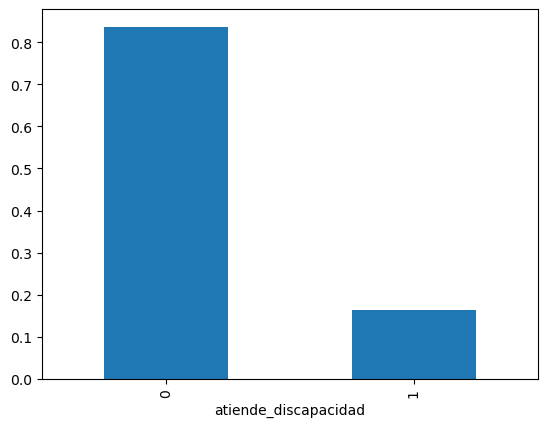

In [209]:
# Gráfico de porcentajes de escuelas que que atienden o no a personas con discapacidad
df_datosie['atiende_discapacidad'].value_counts(normalize=True).plot(kind='bar')
plt.show()

In [210]:
# Ver valores únicos en la variable 'zona'
df_datosie['zona'].value_counts()

zona
URBANA          3292
RURAL           1271
URBANA,RURAL     115
RURAL,URBANA      67
Name: count, dtype: int64

<Axes: xlabel='zona'>

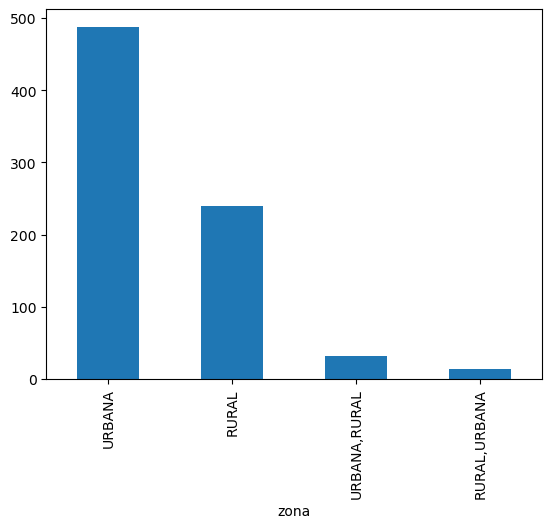

In [211]:
# Gráfico de las escuelas que atienden estudiantes en condición de discapacidad por zona
df_datosie[df_datosie['atiende_discapacidad'] == 1]['zona'].value_counts().plot(kind='bar')

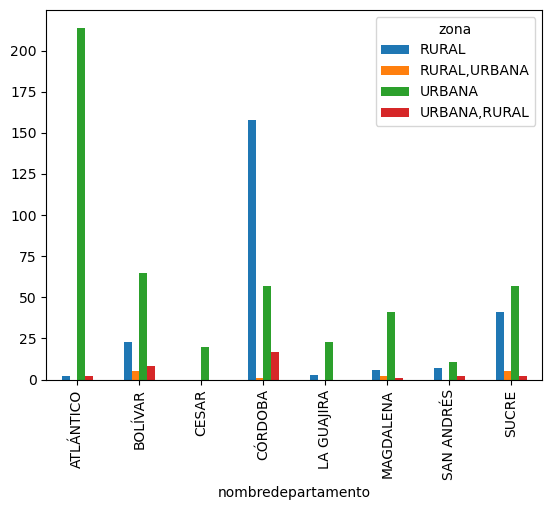

In [212]:
# Ver los valores unicos en la columna nombredepartamento
df_datosie['nombredepartamento'].unique()

# Gráfico del número de escuelas que atienden a personas con discapacidad por departamento y por zona
df_datosie[df_datosie['atiende_discapacidad'] == 1].groupby(['nombredepartamento', 'zona']).size().unstack().plot.bar()
plt.show()

8. Guardar el DataFrame limpio

In [243]:
# Guardar el DataFrame limpio es un nuevo documento Excel

df_datosie.to_excel('documents/clean_df_datosie.xlsx', index=False)

In [768]:
discapacidades = df_datosie
discapacidades

,secretaria,codigodepartamento,nombredepartamento,nombremunicipio,nombreestablecimiento,zona,niveles,jornadas,discapacidades,calendario,...,SA-USUARIO DE LSC,SISTÉMICA,SORDERA PROFUNDA,SORDOCEGUERA,SV-BAJA VISIÓN,SV-CEGUERA,SÍNDROME DE DOWN,TRANSTORNO DEL ESPECTRO AUTISTA,VOZ Y HABLA,zona_num
26,SOLEDAD,8,ATLÁNTICO,SOLEDAD,CENTRO EDUCATIVO QUIERO APRENDER DE VI¥A DEL REY,URBANA,"PREESCOLAR,BÁSICA SECUNDARIA,BÁSICA PRIMARIA","MAÑANA,TARDE",0,A,...,0,0,0,0,0,0,0,0,0,0
29,SOLEDAD,8,ATLÁNTICO,SOLEDAD,LICEO MIXTO JORGE ISAACS,URBANA,"PREESCOLAR,BÁSICA PRIMARIA","MAÑANA,TARDE",0,A,...,0,0,0,0,0,0,0,0,0,0
40,CESAR,20,CESAR,EL COPEY,JARDIN INFANTIL CARITAS ALEGRES,URBANA,"PREESCOLAR,BÁSICA PRIMARIA",MAÑANA,0,A,...,0,0,0,0,0,0,0,0,0,0
46,SOLEDAD,8,ATLÁNTICO,SOLEDAD,CENTRO EDUCATIVO LOS NI¥OS DE JESUS,URBANA,PREESCOLAR,MAÑANA,0,A,...,0,0,0,0,0,0,0,0,0,0
51,MALAMBO,8,ATLÁNTICO,MALAMBO,CENTRO EDUCATIVO SANTA MARIA MAGDALENA,URBANA,"PREESCOLAR,BÁSICA PRIMARIA",MAÑANA,0,A,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22519,MAGDALENA,47,MAGDALENA,SANTA BÁRBARA DE PINTO,INSTITUCION EDUCATIVA TECNICA DEPARTAMENTAL CI...,RURAL,"PREESCOLAR,MEDIA,BÁSICA SECUNDARIA,BÁSICA PRIM...","MAÑANA,FIN DE SEMANA",0,A,...,0,0,0,0,0,0,0,0,0,1
22521,CIENAGA,47,MAGDALENA,CIÉNAGA,COLEGIO DIVINO NIÑO,URBANA,"PREESCOLAR,BÁSICA PRIMARIA",MAÑANA,0,A,...,0,0,0,0,0,0,0,0,0,0
22522,MAGDALENA,47,MAGDALENA,ZONA BANANERA,C.E. CERRO BLANCO,RURAL,"PREESCOLAR,MEDIA,BÁSICA SECUNDARIA,BÁSICA PRIM...","MAÑANA,NOCTURNA,TARDE,FIN DE SEMANA",0,A,...,0,0,0,0,0,0,0,0,0,1
22525,MAGDALENA,47,MAGDALENA,SITIONUEVO,CENTRIO DE FORMACION INFANTIL RAYITO DE LUZ,URBANA,"PREESCOLAR,BÁSICA PRIMARIA",MAÑANA,0,A,...,0,0,0,0,0,0,0,0,0,0


In [714]:
discapacidades['zona_num']= discapacidades ['zona'].map({'URBANA': 0, 'RURAL':1, 'URBANA,RURAL':0, 'RURAL,URBANA':1})
discapacidades[['zona_num','zona']]

,zona_num,zona
26,0,URBANA
29,0,URBANA
40,0,URBANA
46,0,URBANA
51,0,URBANA
...,...,...
22519,1,RURAL
22521,0,URBANA
22522,1,RURAL
22525,0,URBANA


In [770]:
discapacidades['zona_num'].value_counts()

zona_num
0    3407
1    1338
Name: count, dtype: int64

In [772]:

# Porcentaje de filas a eliminar (por ejemplo 50%)
porcentaje = 0.52

# Filtramos las filas donde zona == 0
filas_cero = discapacidades[discapacidades['zona_num'] == 0]

# Calculamos cuántas eliminar
num_eliminar = int(len(filas_cero) * porcentaje)

# Seleccionamos aleatoriamente las filas a eliminar
filas_a_eliminar = filas_cero.sample(n=num_eliminar, random_state=42)

# Eliminamos esas filas del DataFrame original
discapacidades = discapacidades.drop(filas_a_eliminar.index)


In [773]:
discapacidades['zona_num'].value_counts()

zona_num
0    1636
1    1338
Name: count, dtype: int64

In [656]:
discapacidades['zona'].value_counts()

zona
URBANA          1577
RURAL           1271
RURAL,URBANA      67
URBANA,RURAL      59
Name: count, dtype: int64

In [658]:
discapacidades.columns

Index(['secretaria', 'codigodepartamento', 'nombredepartamento',
       'nombremunicipio', 'nombreestablecimiento', 'zona', 'niveles',
       'jornadas', 'discapacidades', 'calendario', '0', 'BÁSICA PRIMARIA',
       'BÁSICA SECUNDARIA', 'MEDIA', 'PREESCOLAR', 'PRIMERA INFANCIA',
       'atiende_discapacidad', '0', 'DI-COGNITIVO', 'ENANISMO',
       'HIPOACUSIA O BAJA AUDICIÓN', 'LESIÓN NEUROMUSCULAR',
       'LIMITACIÓN FISICA (MOVILIDAD)', 'MÚLTIPLE DISCAPACIDAD',
       'OTRA DISCAPACIDAD', 'PARALISIS CEREBRAL', 'PSICOSOCIAL',
       'SA-USUARIO DE CASTELLANO', 'SA-USUARIO DE LSC', 'SISTÉMICA',
       'SORDERA PROFUNDA', 'SORDOCEGUERA', 'SV-BAJA VISIÓN', 'SV-CEGUERA',
       'SÍNDROME DE DOWN', 'TRANSTORNO DEL ESPECTRO AUTISTA', 'VOZ Y HABLA',
       'zona_num'],
      dtype='object')

Caracteristicas y etiquetas

In [776]:
# características
X = discapacidades[['DI-COGNITIVO', 'ENANISMO',
       'HIPOACUSIA O BAJA AUDICIÓN', 'LESIÓN NEUROMUSCULAR',
       'LIMITACIÓN FISICA (MOVILIDAD)', 'MÚLTIPLE DISCAPACIDAD',
       'OTRA DISCAPACIDAD', 'PARALISIS CEREBRAL', 'PSICOSOCIAL',
       'SA-USUARIO DE CASTELLANO', 'SA-USUARIO DE LSC', 'SISTÉMICA',
       'SORDERA PROFUNDA', 'SORDOCEGUERA', 'SV-BAJA VISIÓN', 'SV-CEGUERA',
       'SÍNDROME DE DOWN', 'TRANSTORNO DEL ESPECTRO AUTISTA', 'VOZ Y HABLA']]

# variable objetivo
y = discapacidades['zona_num']

X, y

(       DI-COGNITIVO  ENANISMO  HIPOACUSIA O BAJA AUDICIÓN  \
 29                0         0                           0   
 40                0         0                           0   
 46                0         0                           0   
 51                0         0                           0   
 53                0         0                           0   
 ...             ...       ...                         ...   
 22514             0         0                           0   
 22516             0         0                           0   
 22517             0         0                           0   
 22519             0         0                           0   
 22522             0         0                           0   
 
        LESIÓN NEUROMUSCULAR  LIMITACIÓN FISICA (MOVILIDAD)  \
 29                        0                              0   
 40                        0                              0   
 46                        0                              0   
 5

Hipotesis 

Pregunta guía: ¿Qué porcentaje de establecimientos incluye educación para personas con discapacidad en la zona rural de la región caribe?

HO: En la Región Caribe colombiana, se presentó una baja proporción de escuelas ubicadas en zonas rurales que atienden a estudiantes con discapacidad en comparación con aquellas ubicadas en zonas urbanas o mixtas.

H1: En la Región Caribe colombiana, no se presentó una baja proporción de escuelas ubicadas en zonas rurales que atienden a estudiantes con discapacidad en comparación con aquellas ubicadas en zonas urbanas o mixtas

Entrenamiento del modelo

In [762]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [778]:
# Crear el modelo
model = DecisionTreeClassifier()


# Entrenar
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)


# Evaluación
reporte = classification_report(y_test, y_pred)

print(reporte)


              precision    recall  f1-score   support

           0       0.59      0.93      0.72       351
           1       0.53      0.10      0.17       258

    accuracy                           0.58       609
   macro avg       0.56      0.52      0.44       609
weighted avg       0.56      0.58      0.49       609



In [792]:
accuracy_discapacidades = accuracy_score(y_test, y_pred)

matriz_confusion_discapacidades = confusion_matrix(y_test, y_pred)

matriz_confusion_discapacidades, accuracy_discapacidades

(array([[328,  23],
        [232,  26]], dtype=int64),
 0.5812807881773399)

Text(50.722222222222214, 0.5, 'Valores reales')

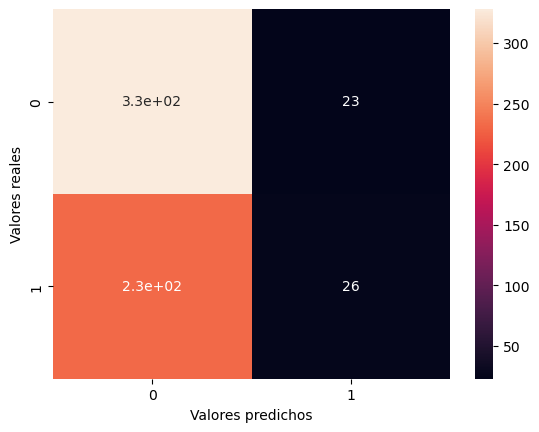

In [794]:
sns.heatmap(matriz_confusion_discapacidades, annot=True)
plt.xlabel('Valores predichos')
plt.ylabel('Valores reales')

In [800]:
precision_discapacidades = precision_score(y_test, y_pred, average='macro')

umbral_hipotesis = 0.85

print(precision_discapacidades, '\n')

if precision_discapacidades>=umbral_hipotesis:
    print('Se rechaza la H0 (hipótesis nula) y se acepta la H1 (hipótesis alternativa)\nH1: Si existe una relación entre al menos una de las características obtenidas a partir de las imágenes digitalizadas con el diagnóstico de cancer de mama.')
else:
    print('Se acepta la H0 (hipótesis nula)')

0.5581632653061225 

Se acepta la H0 (hipótesis nula)
